In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (16,10)

In [4]:
mhcnuggets_binders = pd.read_csv('../data/epitope-predictions/predicted-binders.csv')

In [5]:
print(f'Binders per alleles\n {mhcnuggets_binders.groupby("allele").size()}')

Binders per alleles
 allele
HLA-A01:01         859
HLA-A02:06       50840
HLA-A11:01       44541
HLA-A23:01       31006
HLA-A30:01       32407
HLA-A32:01       13102
HLA-A33:01       28624
HLA-B07:02       10290
HLA-B08:01       21292
HLA-B15:01       84375
HLA-B40:01        6435
HLA-B44:02         335
HLA-B53:01       10054
HLA-B58:01       23644
HLA-DRB101:01    82671
HLA-DRB103:01     9903
HLA-DRB104:01    75196
HLA-DRB104:04    26578
HLA-DRB107:01    62121
HLA-DRB108:01     1154
HLA-DRB111:01    29466
HLA-DRB112:01    29529
HLA-DRB112:02    62457
HLA-DRB113:01    49355
HLA-DRB115:01    80997
dtype: int64


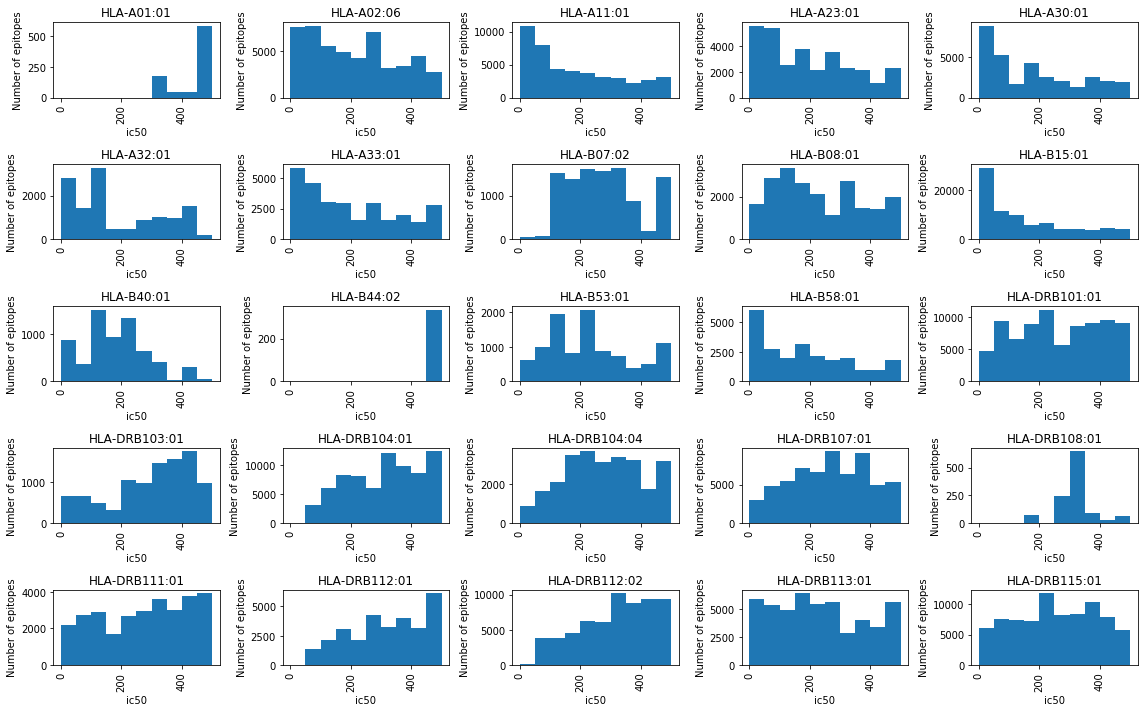

In [6]:
# ic50 distribution per alelles
# -> helps determining which alleles have strong binders and which ones don't
axarr = mhcnuggets_binders['ic50'].hist(by=mhcnuggets_binders['allele'], range=[0, 500])
for ax in axarr.flatten():
    ax.set_xlabel("ic50")
    ax.set_ylabel("Number of epitopes")
plt.tight_layout()

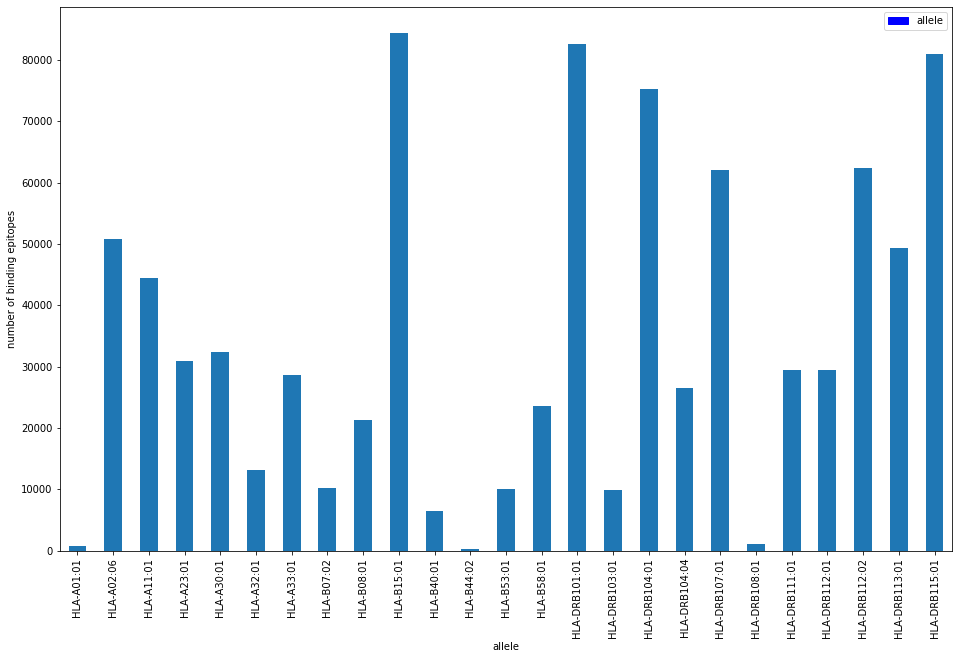

In [7]:
# plot number of binders per allele
mhcnuggets_binders.groupby("allele").count()['ic50'].plot.bar()
plt.ylabel('number of binding epitopes')
binder_patch = mpatches.Patch(color='blue', label='allele')
plt.legend(handles=[binder_patch])